# Анализ продаж видеоигр для интернет-магазина

## Описание проекта 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявлены определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В проекте проведен как общий анализ по всему сету за актуальный период, так и даны рекомендации по каждому региону отдельно - NA, EU и JP.

## Описание данных
* __Name__ — название игры


* __Platform__ — платформа


* __Year_of_Release__ — год выпуска


* __Genre__ — жанр игры


* __NA_sales__ — продажи в Северной Америке (миллионы проданных копий)


* __EU_sales__ — продажи в Европе (миллионы проданных копий)


* __JP_sales__ — продажи в Японии (миллионы проданных копий)


* __Other_sales__ — продажи в других странах (миллионы проданных копий)


* __Critic_Score__ — оценка критиков (максимум 100)


* __User_Score__ — оценка пользователей (максимум 10)


* __Rating__ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Оглавление

* [Ознакомление с данными](#1)

* [Предобработка данных](#2)

* [Исследовательский анализ данных](#3)

* [Портрет пользователя каждого региона](#4)

* [Проверка гипотез](#5)

* [Общий вывод](#6)

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_rows', 1000)

<a id='1'></a>
## 1. Ознакомление с данными

In [6]:
df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [9]:
df.duplicated().sum()

0

__Промежуточный вывод__

* __Пропуски__ Существенное количество пропусков в колонках 'User_score' и 'Critic_score', предлагаю их не заполнять, ниже будет дано обоснование. Так же много пропусков в 'Rating', их вполне можно заполнить исходя из жанра игры. 'Year_of_Relese' содержит около 300 пропусков, предлагаю их заполнить медианным для игр с той же платформы. 2 строчки не содержат названий и жанра, их можно просто удалить.


* __Типы данных__ Годы - в int, critic и user_score в float() (оставляем пропуски), tbd (to be determined) - эквивалентно пропускам, т.к. агрегатор оценку игре еще не вычислил.


* __Дубликатов__  нет

__PS__ Вообще недостающие данные можно взять на Metacritic, не совсем понятно 'легален' ли будет такой способ в учебном проекте, ну и в парсинге сайтов я мягко говоря не силен. 

<a id='2'></a>
## 2. Предобработка данных

### Нижний регистр

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Приведение типов

заменяем To Be Determined на Nan

In [11]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd')
len(df[df['user_score'] == 'tbd'])

0

In [12]:
#приводим user_score к float 
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### Пропуски

In [13]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
# удаляем безымянные строчки
df.dropna(subset = ['name'], inplace = True)

In [15]:
# генерируем словарь для заполнения 'rating' - каждому жанру ставим в соответствие наиболее популярный рейтинг
d = {}
for genre in df['genre'].unique():
    d[genre] = df[df['genre'] == genre]['rating'].value_counts().index[0]
d

{'Sports': 'E',
 'Platform': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Puzzle': 'E',
 'Misc': 'E',
 'Shooter': 'M',
 'Simulation': 'E',
 'Action': 'T',
 'Fighting': 'T',
 'Adventure': 'E',
 'Strategy': 'T'}

In [16]:
# заполняем пропуски в 'rating'
df['rating'] = df['rating'].fillna(df['genre'].map(d))
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,T
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E


In [17]:
# вычисляем медианный год для каждой платформы
d = df.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'median').to_dict()
d = d['year_of_release']
d

{'2600': 1982.0,
 '3DO': 1995.0,
 '3DS': 2013.0,
 'DC': 2000.0,
 'DS': 2008.0,
 'GB': 1997.0,
 'GBA': 2003.0,
 'GC': 2003.0,
 'GEN': 1993.0,
 'GG': 1992.0,
 'N64': 1999.0,
 'NES': 1986.5,
 'NG': 1994.5,
 'PC': 2010.0,
 'PCFX': 1996.0,
 'PS': 1998.0,
 'PS2': 2005.0,
 'PS3': 2011.0,
 'PS4': 2015.0,
 'PSP': 2009.0,
 'PSV': 2014.0,
 'SAT': 1996.0,
 'SCD': 1994.0,
 'SNES': 1994.0,
 'TG16': 1995.0,
 'WS': 2000.0,
 'Wii': 2009.0,
 'WiiU': 2013.0,
 'X360': 2010.0,
 'XB': 2004.0,
 'XOne': 2015.0}

In [18]:
# заполняем пропуски в 'year_of_release'
df['year_of_release'] = df['year_of_release'].fillna(df['platform'].map(d))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Приведение типов 2

In [19]:
# теперь можно перевести годы в int
df['year_of_release'] = np.round(df['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Почему не заполняем critic_score и user_score

Оценки критиков и игроков хорошо коррелируют, с помощью линейной аппроксимации в принципе можно заполнить часть пропусков

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

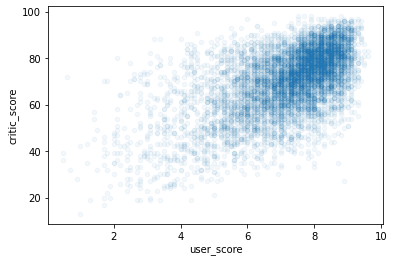

In [20]:
df.plot(x = 'user_score', y = 'critic_score', kind = 'scatter', alpha = 0.05)

In [21]:
len(df.query('critic_score == "Nan" and user_score != "Nan" or critic_score != "Nan" and user_score == "Nan"'))

0

Однако значительно уменьшить их таким образом не получиться. Другие способы (медиана по платформе, году или жанру) внесут слишком сильные искажения в данные, чего допускать бы не хотелось

### Вычисление суммарного дохода

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


__Промежуточный вывод__ Привели назания колонок к нижнему регистру. Удалили две строчи без названия игр, заполнили пропуски в year_of_realease исходя из платформы игры, rating  - иходя из жанра. Колонки critic_score и user_score оставили с незаполненными пропусками чтобы не вносить искажения в данные. 

year_of_realease привели к типу int, в user_score заменили TBD на NaN, user_score привели к float() (int нельзя из-за пропусков имеющих тип float)

<a id='3'></a>
## 3. Исследовательский анализ данных

### Количество игр по годам

In [23]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').T

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,9,46,53,17,14,14,21,16,15,17,...,1197,1457,1476,1302,1161,653,552,582,606,502


Text(0.5, 1.0, 'Released games dynamics by years')

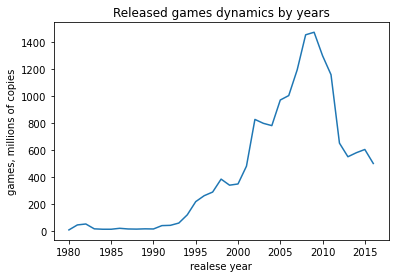

In [24]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(legend = False)
plt.xlabel('realese year')
plt.ylabel('games, millions of copies')
plt.title('Released games dynamics by years')

Значительный рост выпускаемых игр начался с 1990 года, максимум - в 2009, после чего начался значительный спад, связанный видимо с мировым экономическим кризисом 2008-2009 годов.  

### Динамика продаж по платформам

Text(0, 0.5, 'games')

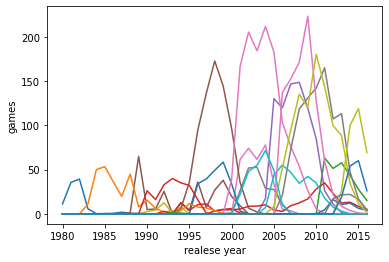

In [25]:
df.pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').fillna(0).plot(legend = False)
plt.xlabel('realese year')
plt.ylabel('games')

из-за большого количесвтва платформ график получился перегруженным, для удобство отследим динамику 10 наиболее популярных платформ

In [26]:
df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [27]:
n = 10
top_platforms = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).index[:n]
top_platforms = list (top_platforms)
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

(1990.0, 2016.0)

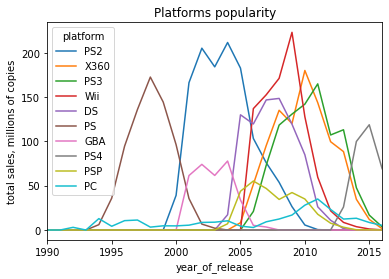

In [28]:
(df
 .pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum')
 .fillna(0)[top_platforms]
 .plot()
)
plt.title('Platforms popularity')
plt.ylabel('total sales, millions of copies')
plt.xlim(1990, 2016)

На этом графике уже очень хорошо видна переодическая смена поколений игровых платформ. Выберем платформы соответствующие поколению 2005 - 2013 (PS3, X360, Wii) и 2013 - 2020 (PS4, XOne, WiiU). Так как нас интересует прогноз на 2017 год, именно эти консоли нам нужны в первую очередь. PC оставим для сравнения, на персональных компьютерах разумеется нет смены поколений, т.к. новое игровое железо появляется каждый год.

(2004.0, 2016.0)

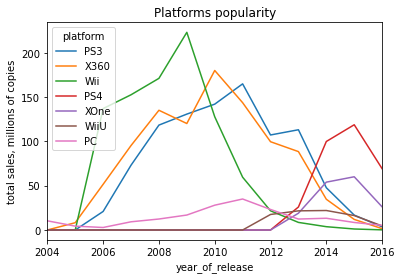

In [29]:
past_and_next_gen = ['PS3', 'X360', 'Wii','PS4', 'XOne', 'WiiU', 'PC']
(df
 .pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum')
 .fillna(0)[past_and_next_gen]
 .plot()
)
plt.title('Platforms popularity')
plt.ylabel('total sales, millions of copies')
plt.xlim(2004, 2016)

Таким образом: 

* около 8 лет между релизами консолей соседних поколений

* актуальный период начинается с 2013 года (релиз PS4 и XOne)

Просадка продаж в 2016 обьясняется неполнотой данных за этот год

In [30]:
actual_df = df.query('year_of_release > 2012')
len(actual_df)

2242

Найдем 7 наиболее популярных платформ в актуальном периоде

In [31]:
n = 7
top_platforms = actual_df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).index[:n]
top_platforms = list (top_platforms)
top_platforms

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC']

И отследим динамику продаж игр на этих платформах

Text(0, 0.5, 'total sales, millions of copies')

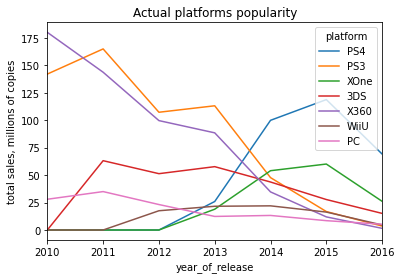

In [32]:
(df
 .pivot_table(index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum')
 .fillna(0)[top_platforms]
 .plot()
)
plt.xlim(2010, 2016)
plt.title('Actual platforms popularity')
plt.ylabel('total sales, millions of copies')

Ожидаемо игровые платформы старого поколения (PS3, X360, 3DS) показывают негативную динамику, в 2017 году продажи уйдут почти в 0. Безусловным лидиром нового поколения является sony playstation 4, существенно хуже дела идут у microsoft - XOne почти в два раза отстает по продажам от PS4. Относительно хорошо держится консоль nintendo - 3DS хоть и принадлежит старому покалению консолей, однако является третьей по популярности игровой платформой.

In [33]:
good_platforms = ['PS4', 'XOne', '3DS']

### Ящик с усами для перспективных игровых платформ

Text(0, 0.5, 'total sales, millions of copies')

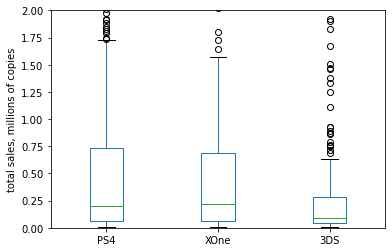

In [34]:
(actual_df
         .pivot_table(index = 'name', columns = 'platform', values = 'total_sales')[good_platforms]
         .plot(kind = 'box')
)
plt.ylim(0, 2)
plt.ylabel('total sales, millions of copies')

На графике отражена следующая особенность игрового рынка - большинство выходящих игр продается небольшими тиражами - около 700-800 тыс. копий более 75% игр, суммарную же продажу на платформе задирают вверх крупные проекты с большим рекламным бюджетом. Отсюда и получаем колоссальный разрыв между медианой и средним, а так же большое число выбросов.

In [35]:
(actual_df
         .pivot_table(index = 'name', columns = 'platform', values = 'total_sales')
         .describe()
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,311.000000,8.000000,189.000000,345.000000,392.000000,67.000000,359.000000,23.000000,115.000000,186.000000,247.000000
mean,0.464437,0.192500,0.208624,0.525884,0.801378,0.052239,0.092618,0.593913,0.562000,0.735484,0.645020
std,1.364530,0.172026,0.352304,1.451939,1.609456,0.059768,0.153857,0.915432,1.038778,1.663275,1.036139
min,0.010000,0.030000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.067500,0.030000,0.040000,0.060000,0.015000,0.020000,0.045000,0.060000,0.080000,0.060000
50%,0.090000,0.150000,0.080000,0.150000,0.200000,0.020000,0.040000,0.180000,0.200000,0.265000,0.220000
75%,0.280000,0.252500,0.230000,0.510000,0.730000,0.070000,0.110000,0.755000,0.595000,0.795000,0.685000
max,14.600000,0.510000,3.050000,21.050000,14.630000,0.240000,1.960000,3.580000,7.090000,16.270000,7.390000


### Связь между оценками и продажами на PS4

In [36]:
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01


Text(2, 10, 'corr = -0.032')

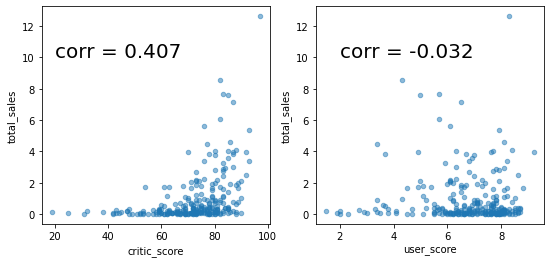

In [39]:
plt.figure(figsize=(9, 4))
ax = plt.subplot(1, 2, 1)
corr = actual_df.query('platform == "PS4"')['critic_score'].corr(actual_df.query('platform == "PS4"')['total_sales'])
actual_df.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.5, ax = ax)
plt.text(20, 10, 'corr = {:.3f}'.format(corr), fontsize = 20)
ax = plt.subplot(1, 2, 2)
actual_df.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.5, ax = ax)
corr = actual_df.query('platform == "PS4"')['user_score'].corr(actual_df.query('platform == "PS4"')['total_sales'])
plt.text(2, 10, 'corr = {:.3f}'.format(corr), fontsize = 20)

Есть слабая связь между оценками от игровых критиков и суммарными продажами, при чем для игр с тиражом более 1 млн копий эта связь сильнее. Что удивительно связи между оценками игроков и продажами нет вообще.

Text(1, 15, 'corr = -0.002')

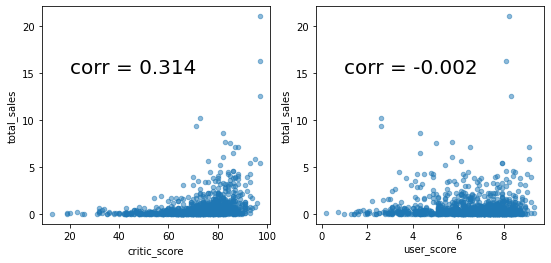

In [41]:
plt.figure(figsize=(9, 4))
ax = plt.subplot(1, 2, 1)
corr = actual_df['critic_score'].corr(actual_df['total_sales'])
actual_df.plot(x='critic_score', y='total_sales', kind='scatter', alpha = 0.5, ax = ax)
plt.text(20, 15, 'corr = {:.3f}'.format(corr), fontsize = 20)
ax = plt.subplot(1, 2, 2)
actual_df.plot(x='user_score', y='total_sales', kind='scatter', alpha = 0.5, ax = ax)
corr = actual_df['user_score'].corr(actual_df['total_sales'])
plt.text(1, 15, 'corr = {:.3f}'.format(corr), fontsize = 20)

Если взять сет данных по всем платформам, то качественно картина та же, хотя корреляция между оценками критиков и продажами несколько меньше

### Продажи по жанрам

Text(0, 0.5, 'total sales, millions of copies')

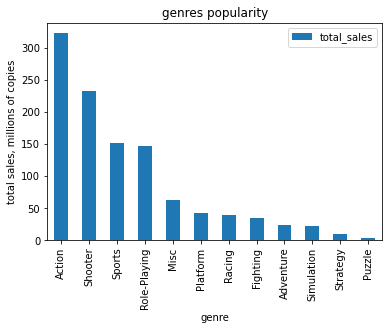

In [42]:
(actual_df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
          .sort_values(by = 'total_sales', ascending = False)
          .plot(kind = 'bar', title = 'genres popularity')
)
plt.ylabel('total sales, millions of copies')

Наиболее популярные жанры - Action, Shooter, Sports, RPG. Наименее - Puzzle и Strategy

__Промежуточный вывод__ 

* Значительный рост выпускаемых игр начался с 1990 года, максимум - в 2009, после чего начался значительный спад, связанный с мировым экономическим кризисом 2008-2009 годов. 

* Время между релизами соседних поколений в последние десятилетия составляют около 8 лет, время жизни одного игрового поколения в плане продаж немного больше - около 10 лет.

* Актуальный период начинается с 2013 года, самые потенциально прибыльные платформы XOne и PS4.

* Существует слабая связь между оценками игровых журналистов и продажами игр (corr 0.3 - 0.4), при этом нет никакой связи между продажами и оценками пользователей

* Наиболее популярные жанры - Action, Shooter, Sports, RPG. Наименее - Puzzle и Strategy

* Большинство выходящих игр продается небольшими тиражами - около 700-800 тыс. копий более 75% игр, суммарную же продажу на платформе задирают вверх крупные проекты с большим рекламным бюджетом. Тиражи таких пректов (например GTA 5) могус составлять 10_ки миллионов проданных копий или больше

<a id='4'></a>
## 4. Портрет пользователя каждого региона

### Топ-5 платформ по регионам

In [43]:
regions = ['NA', 'EU', 'JP']
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,E,0.01


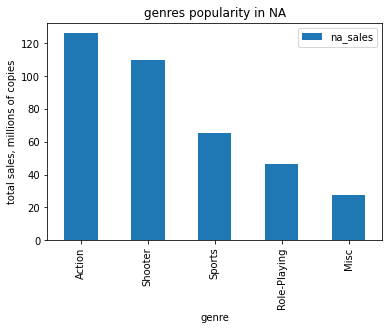

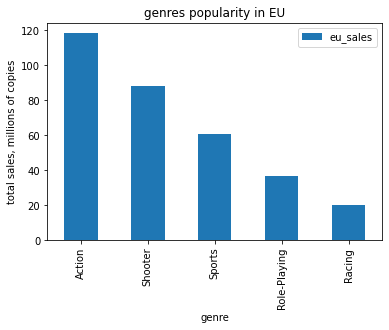

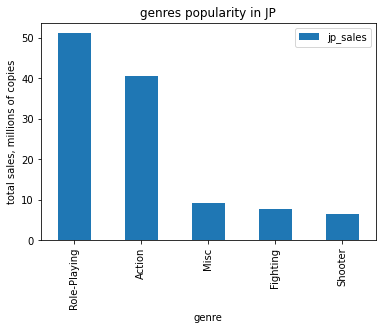

In [44]:
n = 5
for region in regions:
    (actual_df.pivot_table(index = 'genre', values = region.lower() + '_sales', aggfunc = 'sum')
              .sort_values(by = region.lower() + '_sales', ascending = False)[:n]  
              .plot(kind = 'bar', title = 'genres popularity in ' + region)
     
    )
    plt.ylabel('total sales, millions of copies')

### Топ-5 жанров по регионам

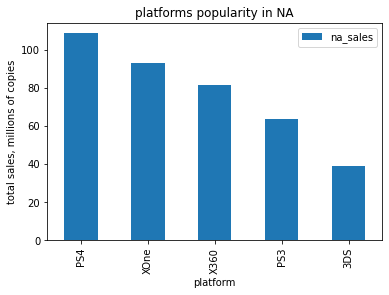

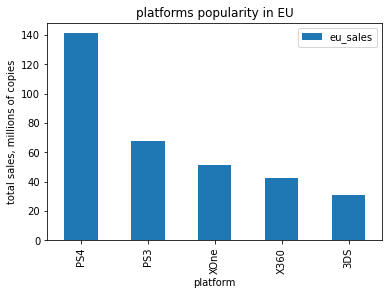

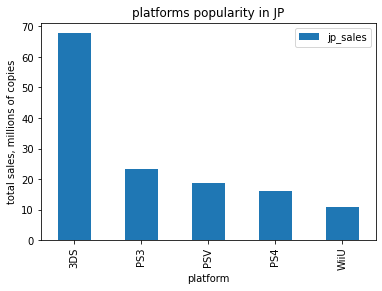

In [45]:
n = 5
for region in regions:
    (actual_df.pivot_table(index = 'platform', values = region.lower() + '_sales', aggfunc = 'sum')
              .sort_values(by = region.lower() + '_sales', ascending = False)[:n]  
              .plot(kind = 'bar', title = 'platforms popularity in ' + region)
     
    )
    plt.ylabel('total sales, millions of copies')

### Влияние рейтинга на продажи по регионам

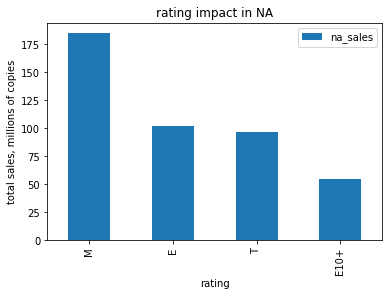

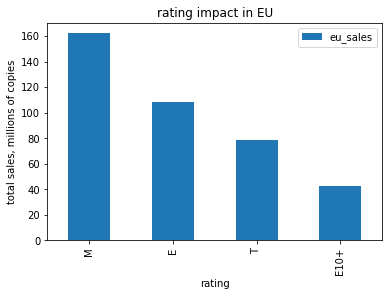

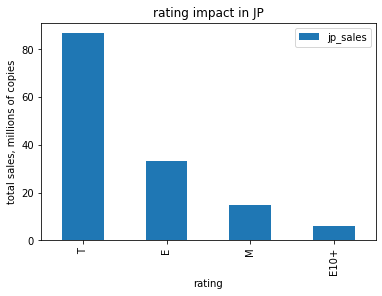

In [46]:
for region in regions:
    (actual_df.pivot_table(index = 'rating', values = region.lower() + '_sales', aggfunc = 'sum')
              .sort_values(by = region.lower() + '_sales', ascending = False)  
              .plot(kind = 'bar', title = 'rating impact in ' + region)
     
    )
    plt.ylabel('total sales, millions of copies')

__Потрет пользователя каждого региона__

* __NA__ Наиболее популярные платформы PS4 и XOne, при чем оставание XOne от PS4 минимально в этом регионе. Самые популярные жанры - Action, Shooter, Sports. Самое строгое возрастное ограничение - M (18+) не мешает продажам, поэтому подавляющее количество игроков - совершеннолетние. 


* __EU__ Регион почти идентичен северной америке за исключением предпочтений в платформах - наиболее популярны PS4 и PS3 с двухкратным превосходством продаж на PS4


* __JP__ Япония наиболее специфический регион. С совершенно другими предпочтениями в жанрах - RPG и Action, платформах - 3DS и PS3. А так же с существенным влиянием возрастного рейтинга игры на продажи, наиболее популярная категория продаваемых игр T - для подростков.

<a id='5'></a>
## 5. Проверка гипотез

### Средние пользовательские оценки XOne и PC

Text(0.5, 1.0, 'user score distribution')

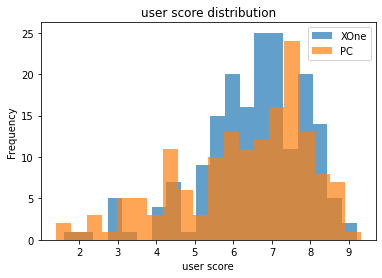

In [47]:
ax = actual_df.query('platform == "XOne"').plot(kind = 'hist', y = 'user_score', label = 'XOne', bins = 20, alpha = 0.7)
actual_df.query('platform == "PC"').plot(kind = 'hist', y = 'user_score', label = 'PC', bins = 20, alpha = 0.7, ax = ax)
plt.xlabel('user score')
plt.title('user score distribution')

In [48]:
(actual_df.query('platform == "PC" or platform == "XOne"')
          .pivot_table(index = 'platform', values = 'user_score', aggfunc = ['count', 'mean', 'std', 'var']))

,count,mean,std,var
,user_score,user_score,user_score,user_score
platform,,,,
PC,155,6.269677,1.742381,3.035893
XOne,182,6.521429,1.380941,1.906997


Сформулируем гипотезы $H_0$, $H_1$ вычислим __p-value__, уровень значимости положим $\alpha = 0.05$ 

$H_0$ - средний пользовательский рейтинг платформ __XOne__ и __PC совпадают__

$H_1$ - средний пользовательский рейтинг платформ __XOne__ и __PC различаются__

In [49]:
distribution_xone = actual_df.query('platform == "XOne"').dropna(subset = ['user_score'])['user_score']
distribution_pc = actual_df.query('platform == "PC"').dropna(subset = ['user_score'])['user_score']
alpha = 0.05
#дисперсии разные
result = st.ttest_ind (distribution_xone, distribution_pc, equal_var = False)
if result.pvalue < alpha:
    print('принимаем H1, H0 отвергаем как маловероятную')
else:
    print('не отвергаем H0')  
print('p-value = ', result.pvalue)

не отвергаем H0
p-value =  0.14759594013430463


### Средние пользовательские оценки для жанров Action и Sports

Text(0.5, 1.0, 'user score distribution')

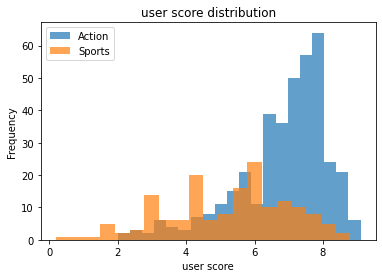

In [50]:
ax = actual_df.query('genre == "Action"').plot(kind = 'hist', y = 'user_score', label = 'Action', bins = 20, alpha = 0.7)
actual_df.query('genre == "Sports"').plot(kind = 'hist', y = 'user_score', label = 'Sports', bins = 20, alpha = 0.7, ax = ax)
plt.xlabel('user score')
plt.title('user score distribution')

In [51]:
(actual_df.query('genre == "Action" or genre == "Sports"')
          .pivot_table(index = 'genre', values = 'user_score', aggfunc = ['count', 'mean', 'std', 'var']))

,count,mean,std,var
,user_score,user_score,user_score,user_score
genre,,,,
Action,390,6.836667,1.328572,1.765105
Sports,160,5.238125,1.783427,3.180613


Аналогично предыдущему случаю

$H_0$ - средний пользовательский рейтинг жанров __Action__ и __Sports совпадают__

$H_1$ - средний пользовательский рейтинг жанров __Action__ и __Sports различаются__

In [52]:
distribution_xone = actual_df.query('genre == "Action"').dropna(subset = ['user_score'])['user_score']
distribution_pc = actual_df.query('genre == "Sports"').dropna(subset = ['user_score'])['user_score']
alpha = 0.05
#дисперсии разные
result = st.ttest_ind (distribution_xone, distribution_pc, equal_var = False)
if result.pvalue < alpha:
    print('принимаем H1, H0 отвергаем как маловероятную')
else:
    print('не отвергаем H0')  
print('p-value = ', result.pvalue)

принимаем H1, H0 отвергаем как маловероятную
p-value =  1.4711831608728666e-20


<a id='6'></a>
## 6. Общий вывод

* Бурный рост колиства вышедших игр начался в начале 1990 и продолжался до кризиса 2008-2009 года, после чего произошел резкий спад. 


* Для игровой индустрии характерна смена игровых поколений. Через определенный период (около 8 лет) конкурирующие между собой компании выпускают новые игровые устройства. Продажи на старом поколении резко идут вниз, на новом сразу начинают расти. На 2016 год консолями нового поколения являлись XOne и PS4 - наиболее перспективные игровые устройства для продажи игр в 2017 году. При этом PS4 уверенно лидирует.


* Существует слабая связь между оценками игровых журналистов и продажами игр (corr 0.3 - 0.4), при этом нет никакой связи между продажами и оценками пользователей.


* Игроки в северной америке и европе, существенно отличаются от игроков в Японии. Популярны разные жанры для NA и EU - Action, Shooter, Sports; для JP - RPG и Action. Играют на разных платформах NA и EU - PS4, PS3, XOne и X360; JP - 3DS и PS3. А так же в Японии в отличие от Америки и Европы сушественно влияет на продажи возрастной рейтинг - наиболее хорошо продаются игры в категории T (для подротсков), в NA и EU - M (18+)